# <font color=green>TP FINAL - ALGORITHMES D'APPRENTISSAGE SUPERVISÉ</font>

- Ricardo Vallejo
- Yulia Kalugina

#  <font color=blue>1.  LOAD DATA</font>

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal = dataOriginal
dataOriginal.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## 1.1. LOAD METADA

In [131]:
cat_si_no = pd.read_excel("Catalogs.xlsx", 'Catálogo SI_NO')
pd.set_option('display.max_rows', None)
cat_si_no.head(5)

,CLAVE,DESCRIPCIÓN
0,1,YES
1,2,NO
2,97,NaN
3,98,IGNORE
4,99,NOT SPECIFIED


In [132]:
cat_pacient_type = pd.read_excel("Catalogs.xlsx", 'Catálogo TIPO_PACIENTE')
pd.set_option('display.max_rows', None)
cat_pacient_type.head(5)

,CLAVE,DESCRIPCIÓN
0,1,AMBULATORIO
1,2,HOSPITALIZADO
2,99,NO ESPECIFICADO


In [133]:
cat_sex = pd.read_excel("Catalogs.xlsx", 'Catálogo SEXO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

,CLAVE,DESCRIPCIÓN
0,1,WOMAN
1,2,MAN
2,99,NaN


In [134]:
cat_result = pd.read_excel("Catalogs.xlsx", 'Catálogo RESULTADO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

,CLAVE,DESCRIPCIÓN
0,1,WOMAN
1,2,MAN
2,99,NaN


<div style="page-break-after: always;"></div>

## <font color=blue>2. IDENTIFYING MODEL VARIABLES </font>


In [135]:
dataInfo = pd.read_excel("covidInfo.xlsx", "DataTypes")
pd.set_option('display.max_rows', None)
dataInfo

,Variable Name,DB Type,Model Type,CATALOG
0,id,String,Non informative,N.A
1,sex,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SEXO
2,patient_type,String / Date,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo TIPO_PACIENTE
3,entry_date,String / Date,Date,N.A
4,date_symptoms,String / Date,Date,N.A
5,date_died,String / Date,Date,N.A
6,intubed,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO
7,pneumonia,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO
8,age,int,"Quantitative, Numerical, Non-ordinal, Nominal",N.A
9,pregnancy,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO


In [137]:
# All labels
datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res']

target_column= 'icu'

model_columns = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]

prefered_columns = ['sex','cardiovascular','obesity','tobacco','contact_other_covid','covid_res', target_column]

<div style="page-break-after: always;"></div>

#  <font color=blue>3. DATA EXPLORATION</font>

# 3.1.  Inspecting for types and Null values detection

In [138]:
dataOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [139]:
dataOriginal.isnull().values.sum()

0

# 3.1.1.  Searching odd information in numerical descriptor - AGE

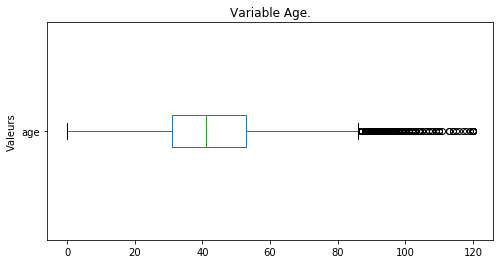

In [140]:
#Diagram de moustache

dataOriginal.boxplot(column='age', figsize=(8,4), vert=False)
plt.ylabel("Valeurs")
plt.title("Variable Age." )
plt.grid()
plt.show()

<font color='blue'>We filter data with ages with outliers?</font>

In [141]:
dataModel =  dataOriginal[dataOriginal['age']<95]


In [142]:
dataModel.shape[0] - dataOriginal.shape[0]

-618

<div style="page-break-after: always;"></div>

# 3.2. Inspecting quantitative variables - Age

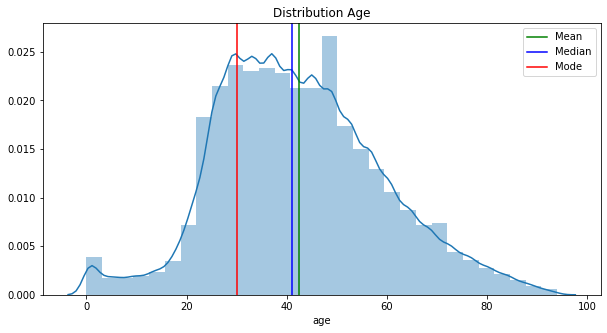

In [145]:
import seaborn as sns

mean=dataModel['age'].mean();
median=dataModel['age'].median();
mode=dataModel['age'].mode();
fig, ax = plt.subplots(figsize=(10,5));

sns.distplot(dataModel['age'], bins=30);
plt.title('Distribution Age');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode')

plt.legend();

In [146]:
mean

42.561939913495785

In [147]:
mode

0    30
dtype: int64

# 3.3. Inspecting categorical variables 

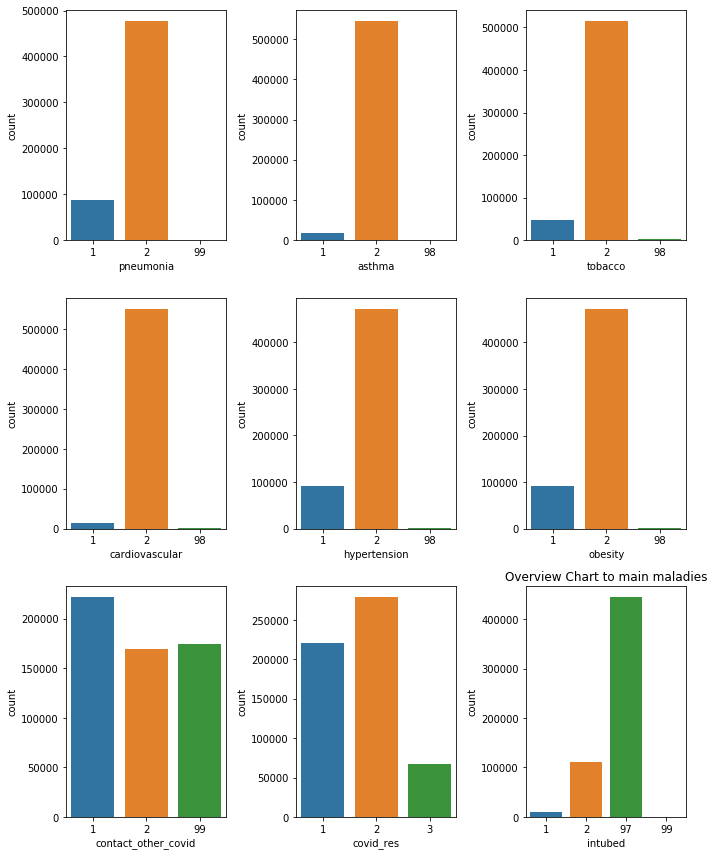

In [148]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots(3,3)
 
fig.set_size_inches(10, 12, forward=True)
plt.title("Overview Chart to main maladies")

sns.countplot(x='pneumonia', data=dataModel, ax=ax[0,0])
sns.countplot(x='asthma', data=dataModel, ax=ax[0,1])
sns.countplot(x='tobacco', data=dataModel, ax=ax[0,2])

sns.countplot(x='cardiovascular', data=dataModel, ax=ax[1,0])
sns.countplot(x='hypertension', data=dataModel, ax=ax[1,1])
sns.countplot(x='obesity', data=dataModel, ax=ax[1,2])

sns.countplot(x='contact_other_covid', data=dataModel, ax=ax[2,0])
sns.countplot(x='covid_res', data=dataModel, ax=ax[2,1])
sns.countplot(x='intubed', data=dataModel, ax=ax[2,2])


#fig.legend() use handles
fig.tight_layout()


In [149]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,YES
1,2,NO
2,97,NaN
3,98,IGNORE
4,99,NOT SPECIFIED


## Calculate numerical values

In [150]:
pd.DataFrame(dataModel['pneumonia'].value_counts())

,pneumonia
2,478032
1,87941
99,11


In [154]:
pd.DataFrame(dataModel['asthma'].value_counts())

,asthma
2,546229
1,18015
98,1740


In [155]:
pd.DataFrame(dataModel['tobacco'].value_counts())

,tobacco
2,516114
1,47975
98,1895


In [156]:
pd.DataFrame(dataModel['pregnancy'].value_counts())

,pregnancy
97,286831
2,273508
1,4063
98,1582


## 3.3.1.  Inspecting categorical variables using bivariable relatioships with sex of patients.


In [157]:
cat_sex

,CLAVE,DESCRIPCIÓN
0,1,WOMAN
1,2,MAN
2,99,NaN


In [158]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,YES
1,2,NO
2,97,NaN
3,98,IGNORE
4,99,NOT SPECIFIED


In [159]:
dataModel.groupby('intubed')['icu'].value_counts()

intubed  icu
1        1        5000
         2        4947
2        2      106452
         1        5081
         99          1
97       97     444379
99       99        124
Name: icu, dtype: int64

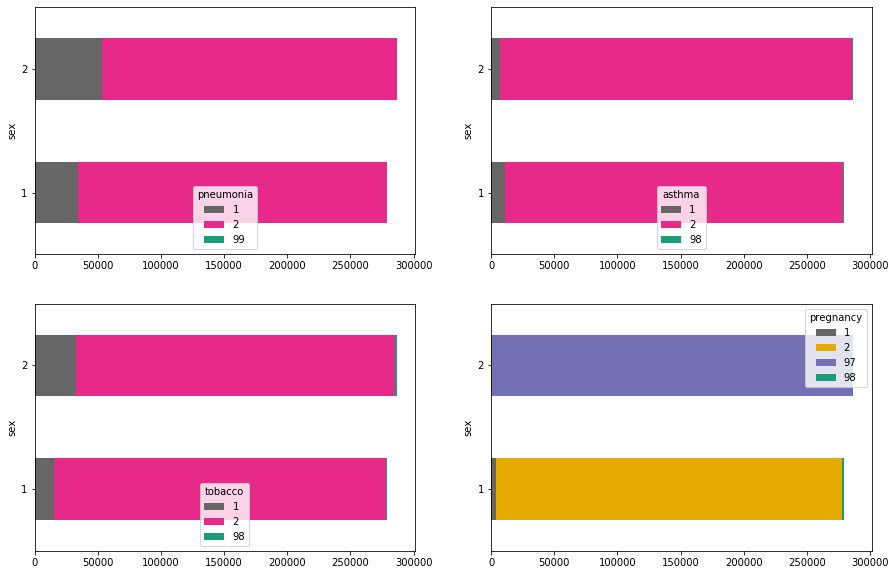

In [160]:
fig, axs = plt.subplots(2,2)

pneumonia_bySex= dataModel.pivot_table(index='sex', columns='pneumonia', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

asthma_bySex= dataModel.pivot_table(index='sex', columns='asthma', values='icu', aggfunc='count')
asthma_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

tobacco_bySex= dataModel.pivot_table(index='sex', columns='tobacco', values='icu', aggfunc='count')
tobacco_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])
,
pregnancy_bySex= dataModel.pivot_table(index='sex', columns='pregnancy', values='icu', aggfunc='count')
pregnancy_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])



## Calculate numerical values

In [161]:
pneumonia_bySex

pneumonia,1,2,99
sex,,,
1,34637,244511,5
2,53304,233521,6


In [162]:
tobacco_bySex

tobacco,1,2,98
sex,,,
1,15534,262851,768
2,32441,253263,1127


In [163]:
asthma_bySex

asthma,1,2,98
sex,,,
1,11195,267235,723
2,6820,278994,1017


In [164]:
pregnancy_bySex

pregnancy,1,2,97,98
sex,,,,
1,4063.0,273508.0,NaN,1582.0
2,NaN,NaN,286831.0,NaN


# 3.3.2. Inspecting categorical variables using bivariable relatioships with ICU (Intensive Care Medical Unit) reference

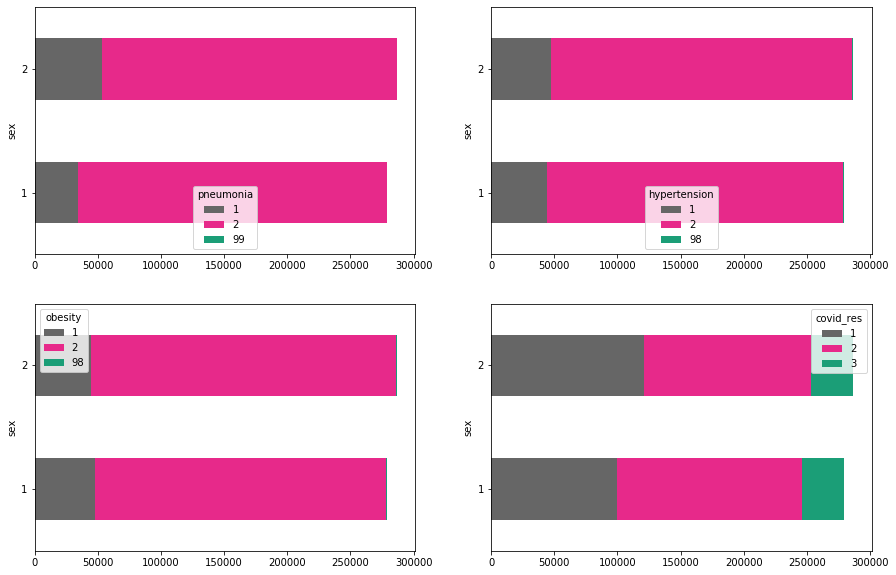

In [165]:
fig, axs = plt.subplots(2,2)

cardiovascular_bySex= dataModel.pivot_table(index='sex', columns='cardiovascular', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

hypertension_bySex= dataModel.pivot_table(index='sex', columns='hypertension', values='icu', aggfunc='count')
hypertension_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

obesity_bySex= dataModel.pivot_table(index='sex', columns='obesity', values='icu', aggfunc='count')
obesity_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])

covid_res_bySex= dataModel.pivot_table(index='sex', columns='covid_res', values='icu', aggfunc='count')
covid_res_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])


In [166]:
cardiovascular_bySex

cardiovascular,1,2,98
sex,,,
1,5800,272599,754
2,6908,278868,1055


In [167]:
hypertension_bySex

hypertension,1,2,98
sex,,,
1,44596,233818,739
2,47697,238062,1072


In [168]:
obesity_bySex

obesity,1,2,98
sex,,,
1,47503,230919,731
2,44740,241053,1038


In [169]:
covid_res_bySex

covid_res,1,2,3
sex,,,
1,99743,146552,32858
2,120688,132158,33985


## Inspecting relationship between categorical variables - Diseases vs ICU assignation - Overview respiratory diseases

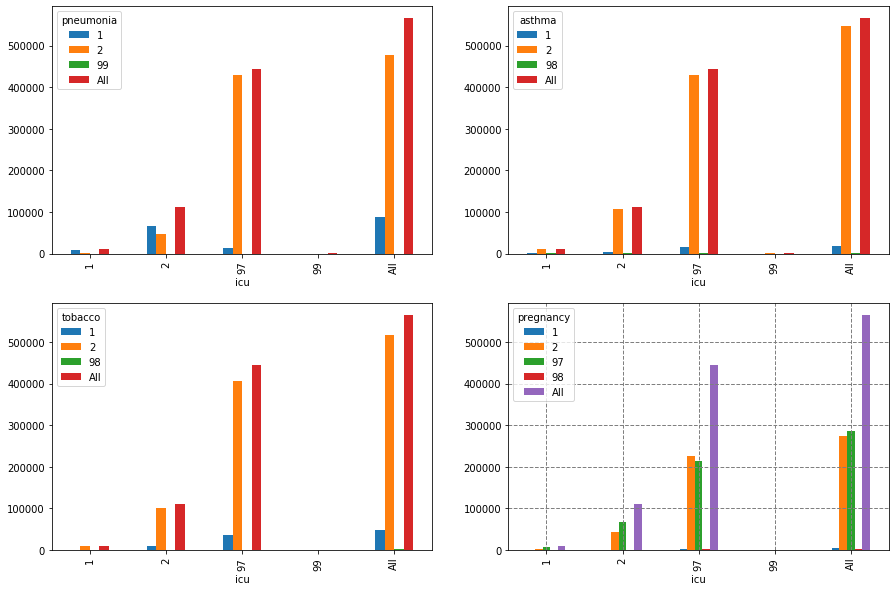

In [170]:
fig, axs = plt.subplots(2,2)
pneumonia_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['pneumonia'], 
            margins=True)
pneumonia_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
asthma_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['asthma'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
tobacco_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['tobacco'], 
            margins=True)
tobacco_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
pregnancy_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['pregnancy'], 
            margins=True)
pregnancy_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


In [171]:
pneumonia_byICU

pneumonia,1,2,99,All
icu,,,,
1,8365,1716,0,10081
2,65110,46289,0,111399
97,14407,429962,10,444379
99,59,65,1,125
All,87941,478032,11,565984


In [172]:
asthma_byICU

asthma,1,2,98,All
icu,,,,
1,246,9721,114,10081
2,2890,108040,469,111399
97,14876,428346,1157,444379
99,3,122,0,125
All,18015,546229,1740,565984


In [173]:
tobacco_byICU

tobacco,1,2,98,All
icu,,,,
1,867,9101,113,10081
2,9838,101037,524,111399
97,37261,405860,1258,444379
99,9,116,0,125
All,47975,516114,1895,565984


In [174]:
pregnancy_byICU

pregnancy,1,2,97,98,All
icu,,,,,
1,74,3502,6486,19,10081
2,995,43899,66358,147,111399
97,2992,226056,213915,1416,444379
99,2,51,72,0,125
All,4063,273508,286831,1582,565984


## Inspecting relationship between diseases and ICU assignation - Overview General diseases

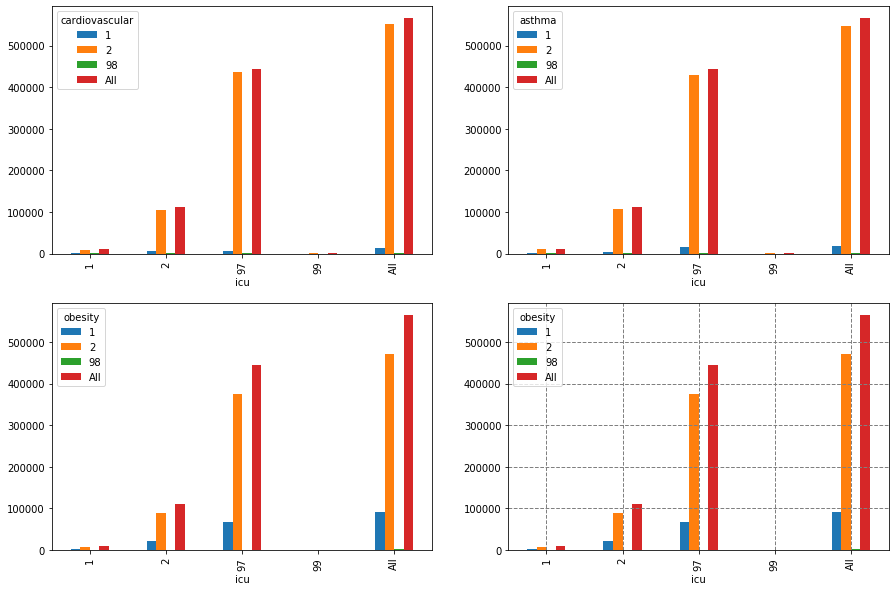

In [175]:
fig, axs = plt.subplots(2,2)
cardiovascular_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['cardiovascular'], 
            margins=True)
cardiovascular_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
hypertension_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['hypertension'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
obesity_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
obesity_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
obesity_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
obesity_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


# 3.3.  Analysis variable quantitative vs qualitative

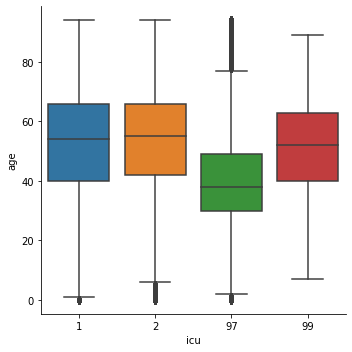

In [176]:
sns.catplot(x="icu", y="age", kind="box", data=dataModel)

# 4.  Classes identification

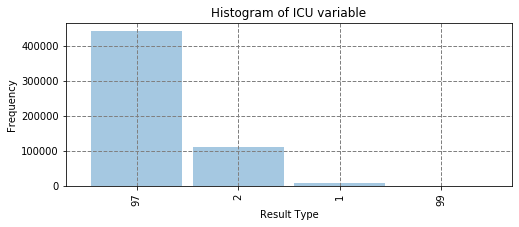

In [177]:
targetOriginal = dataModel['icu']
E1 = targetOriginal.value_counts()
E1.plot(kind = 'bar',
           stacked = 'True',          # Muestra las barras apiladas
           alpha = 0.4,               # nivel de transparencia
           width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
           figsize=(8,3));

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('Histogram of ICU variable')
plt.xlabel("Result Type")
plt.ylabel("Frequency")
plt.show()



In [178]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,YES
1,2,NO
2,97,NaN
3,98,IGNORE
4,99,NOT SPECIFIED


In [179]:
E1

97    444379
2     111399
1      10081
99       125
Name: icu, dtype: int64

## 3.2. Check the distribution or instances of any class

In [180]:
pd.DataFrame(targetOriginal.value_counts())

,icu
97,444379
2,111399
1,10081
99,125


In [181]:
pd.DataFrame(targetOriginal.value_counts(normalize=True) * 100)

,icu
97,78.514410
2,19.682359
1,1.781146
99,0.022085


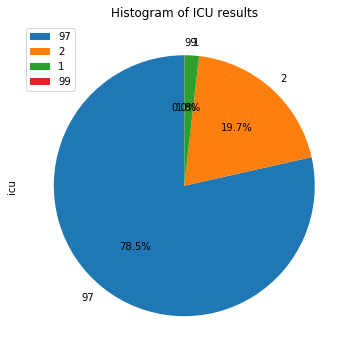

In [182]:
E2 = targetOriginal.value_counts(normalize=True)
E2.plot.pie(subplots=True, figsize = (6,6), autopct = '%1.1f%%', startangle = 90)
plt.title('Histogram of ICU results')
plt.legend(E2.index, loc = 'upper left', fontsize = 10)
plt.show() #ok


#?? Sur tout les data ou seulement sur les donnes ou ilya ICU??

# <font color=blue>4.  IMPUTATION AND DETECTION OF NULL AND ODD VALUES.</font>

## Check for null values in the dataset

In [183]:
dataModel.isnull().values.sum()

0

In [184]:
dataModel.isnull().values.sum()

0

# <font color=blue> 5.  CORRELATION ANALYSIS</font>

## 5.1 Correlation Matrix

# <font color="blue">6.  VARIABLE REDUCTION</font>

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

<font color="red"> Jai essaie Variance Tresholding, normalisation et standarisation, mais ca marche pas pour notre cas.<font>


# 6.2.  Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables

The degree of association between predictor and outcome can be measured with statistics such as X2 (chi-squared) tests.


1.Define Hypothesis
Null Hypothesis (H0): Two variables are independent.
Alternate Hypothesis (H1): Two variables are not independent.

In [185]:
dataOriginal.loc[dataOriginal['icu'] == 97, 'icu2'] = 2
dataOriginal.loc[dataOriginal['icu'] == 98, 'icu2'] = 2
dataOriginal.loc[dataOriginal['icu'] == 99, 'icu2'] = 2
dataOriginal.loc[dataOriginal['icu'] == 1, 'icu2'] = 1
dataOriginal.loc[dataOriginal['icu'] == 2, 'icu2'] = 2

In [186]:
dataOriginal.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,icu2
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,1,97,2.0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,99,1,97,2.0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,99,1,2,2.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,99,1,2,2.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,99,1,2,2.0


In [187]:
target_column= 'icu2'

model_columns = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]



In [188]:
import scipy.stats as ss #import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),3)


cramers_v(dataModel['pneumonia'], dataModel['sex'])


0.085

In [189]:

cramers_v(dataModel['hypertension'], dataModel['obesity'])

0.594

In [190]:
model_columns

['sex',
 'patient_type',
 'intubed',
 'pneumonia',
 'age',
 'pregnancy',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'contact_other_covid',
 'covid_res',
 'icu2']

In [191]:
dataModel['icu2'] = dataOriginal['icu2']

C:\Users\valm044\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
df2 = pd.DataFrame(columns=model_columns, index=model_columns)
for i in range(len(model_columns)):
    for j in range(len(model_columns)):
        fname = model_columns[i]
        cname = model_columns[j]
        df2.loc[fname, cname] = cramers_v(dataModel[fname], dataModel[cname])

display(df2)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu2
sex,1.0,0.097,0.098,0.085,0.054,1.0,0.018,0.011,0.047,0.011,0.013,0.027,0.014,0.021,0.018,0.104,0.049,0.068,0.037
patient_type,0.097,1.0,1.0,0.649,0.405,0.099,0.264,0.121,0.024,0.098,0.238,0.096,0.104,0.065,0.15,0.018,0.286,0.192,0.257
intubed,0.098,1.0,1.0,0.467,0.235,0.058,0.188,0.088,0.028,0.073,0.17,0.072,0.077,0.052,0.108,0.025,0.213,0.137,0.509
pneumonia,0.085,0.649,0.467,1.0,0.227,0.061,0.155,0.067,0.015,0.048,0.136,0.042,0.058,0.051,0.075,0.014,0.132,0.135,0.251
age,0.054,0.405,0.235,0.227,1.0,0.067,0.255,0.155,0.028,0.052,0.294,0.055,0.122,0.091,0.085,0.05,0.122,0.118,0.145
pregnancy,1.0,0.099,0.058,0.061,0.067,1.0,0.058,0.059,0.068,0.056,0.061,0.053,0.058,0.06,0.058,0.091,0.041,0.049,0.037
diabetes,0.018,0.264,0.188,0.155,0.255,0.058,1.0,0.598,0.598,0.564,0.656,0.488,0.587,0.549,0.591,0.551,0.078,0.071,0.076
copd,0.011,0.121,0.088,0.067,0.155,0.059,0.598,1.0,0.653,0.615,0.624,0.53,0.637,0.587,0.631,0.599,0.041,0.012,0.03
asthma,0.047,0.024,0.028,0.015,0.028,0.068,0.598,0.653,1.0,0.627,0.626,0.535,0.641,0.595,0.638,0.605,0.017,0.02,0.021
inmsupr,0.011,0.098,0.073,0.048,0.052,0.056,0.564,0.615,0.627,1.0,0.6,0.575,0.619,0.57,0.618,0.581,0.034,0.015,0.038


In [193]:
df2.shape

(19, 19)

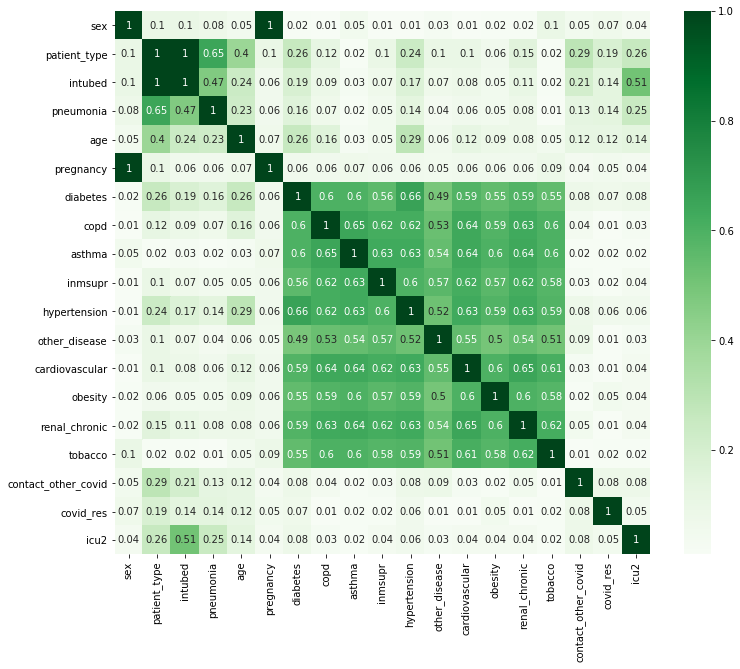

In [194]:
import seaborn as sns

df2 = df2.astype('float')  # !! Neccessary for Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df2.round(2), annot=True, cmap="Greens")
plt.show()

#Dont use patient_type like predicteur because correlation is one and it strongly atached to ICU.


# <font color="blue">7.  MODELISATION & PREDICTION</font>

## <font color="blue">7.1.  Splitting DATA to create Training and Test sets.</font>

In [195]:
# Labels for descriptors

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'age','pneumonia','contact_other_covid',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','intubed'
             ]

target_column= 'icu2'

model_columns = ['sex', 'age','pneumonia','contact_other_covid',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', 'intubed', target_column]


# Split in traning and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dataModel[model_columns], 
                                                   dataModel[target_column], stratify=dataModel[target_column],
                                                   test_size=0.20, random_state=44)



In [197]:
print('size of the train set (by class): \n',X_train.groupby('icu2').size())
print('size of the test set (by class): \n',X_test.groupby('icu2').size())


size of the train set (by class): 
 icu2
1.0      8065
2.0    444722
dtype: int64
size of the test set (by class): 
 icu2
1.0      2016
2.0    111181
dtype: int64


In [199]:

X_train, X_test, y_train, y_test =train_test_split(dataModel[predictors], 
                                                   dataModel[target_column], stratify=dataModel['icu2'],
                                                   test_size=0.20, random_state=44)

# 7.1 KNN

In [174]:
from sklearn import neighbors, datasets
import time

startTimeKNN = time.time()
weights = 'uniform'
k_neighbors = 15
model1 = neighbors.KNeighborsClassifier(weights=weights)
model1.fit(X_train, y_train.values.ravel())
endtimeKNN = time.time()


In [175]:
KNN_sec=endtimeKNN - startTimeKNN
KNN_sec

3.8633134365081787

## 7.1.1  Model Evaluation

In [176]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24358 entries, 35539 to 46314
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  24358 non-null  int64
 1   age                  24358 non-null  int64
 2   pneumonia            24358 non-null  int64
 3   contact_other_covid  24358 non-null  int64
 4   pregnancy            24358 non-null  int64
 5   diabetes             24358 non-null  int64
 6   copd                 24358 non-null  int64
 7   asthma               24358 non-null  int64
 8   inmsupr              24358 non-null  int64
 9   hypertension         24358 non-null  int64
 10  other_disease        24358 non-null  int64
 11  cardiovascular       24358 non-null  int64
 12  obesity              24358 non-null  int64
 13  renal_chronic        24358 non-null  int64
 14  tobacco              24358 non-null  int64
dtypes: int64(15)
memory usage: 3.0 MB


In [177]:
X_test.head(5)

,sex,age,pneumonia,contact_other_covid,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
35539,1,33,2,99,1,2,2,2,2,2,2,2,2,2,2
113658,1,71,2,99,2,1,2,2,1,1,2,2,1,2,2
314064,2,41,1,2,97,2,2,2,1,1,2,2,2,1,2
270671,1,68,1,99,2,2,2,2,2,2,2,2,2,2,2
156183,2,55,1,99,97,1,2,2,2,1,2,2,2,1,2


In [178]:
X_train.head(5)

,sex,age,pneumonia,contact_other_covid,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
164498,1,84,2,99,2,2,1,2,2,1,2,2,2,2,2
29956,2,34,2,2,97,2,2,2,2,2,2,2,2,2,2
413684,1,47,2,99,2,2,2,1,2,1,2,2,2,2,2
224988,2,14,2,99,97,2,2,2,1,2,1,2,2,2,2
367174,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2


In [290]:
# METRIQUES

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import time

y_predicted_train = model1.predict(X_train)
y_predicted_test = model1.predict(X_test)

In [291]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_test, y_test))

eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9075457755152312


-1012.6716842651367

In [292]:
startTimeKNN = time.time()

print(confusion_matrix(y_test, y_predicted_test))

EVAL_KNN_sec = endtimeKNN - startTimeKNN
EVAL_KNN_sec

[[   68  1986]
 [  266 22038]]


-1012.6836810112

In [293]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.8571462128625658


In [294]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.5105900112318896


In [295]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))


F1 score: 0.504170755926643


# 7.2. DESICION TREE

## 7.2.1 DESICION TREE - Entropy

In [296]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

[Text(167.4, 380.52, 'pneumonia <= 50.5\nentropy = 0.412\nsamples = 97430\nvalue = [8058, 89372]'),
 Text(83.7, 271.8, 'intubed <= 1.5\nentropy = 0.552\nsamples = 47769\nvalue = [6123, 41646]'),
 Text(41.85, 163.07999999999998, 'patient_type <= 0.5\nentropy = 0.624\nsamples = 33011\nvalue = [5143, 27868]'),
 Text(20.925, 54.360000000000014, 'entropy = 0.991\nsamples = 359\nvalue = [159, 200]'),
 Text(62.775000000000006, 54.360000000000014, 'entropy = 0.616\nsamples = 32652\nvalue = [4984, 27668]'),
 Text(125.55000000000001, 163.07999999999998, 'patient_type <= 0.5\nentropy = 0.352\nsamples = 14758\nvalue = [980, 13778]'),
 Text(104.625, 54.360000000000014, 'entropy = 0.932\nsamples = 454\nvalue = [158, 296]'),
 Text(146.475, 54.360000000000014, 'entropy = 0.317\nsamples = 14304\nvalue = [822, 13482]'),
 Text(251.10000000000002, 271.8, 'intubed <= 1.5\nentropy = 0.238\nsamples = 49661\nvalue = [1935, 47726]'),
 Text(209.25, 163.07999999999998, 'pregnancy <= 50.0\nentropy = 0.324\nsample

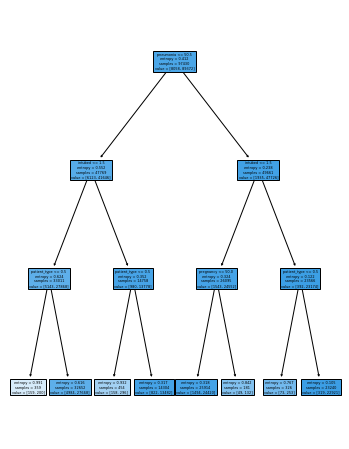

In [297]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (6,8))
plot_tree(desicionTree, feature_names = predictors, filled = True)


In [298]:

y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)



In [299]:

startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9172944678230525


0.00999593734741211

In [300]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.8384598297229584


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [301]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.5


In [302]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.47799065620847797


In [304]:
#Matrice confusion
confusion_matrix(y_test, y_predicted_test)

array([[    0,  2054],
       [    0, 22304]], dtype=int64)

## 7.22 DESICION TREE - GINI


[Text(279.0, 380.52, 'pneumonia <= 50.5\ngini = 0.152\nsamples = 97430\nvalue = [8058, 89372]'),
 Text(139.5, 271.8, 'intubed <= 1.5\ngini = 0.223\nsamples = 47769\nvalue = [6123, 41646]'),
 Text(69.75, 163.07999999999998, 'patient_type <= 0.5\ngini = 0.263\nsamples = 33011\nvalue = [5143, 27868]'),
 Text(34.875, 54.360000000000014, 'gini = 0.493\nsamples = 359\nvalue = [159, 200]'),
 Text(104.625, 54.360000000000014, 'gini = 0.259\nsamples = 32652\nvalue = [4984, 27668]'),
 Text(209.25, 163.07999999999998, 'patient_type <= 0.5\ngini = 0.124\nsamples = 14758\nvalue = [980, 13778]'),
 Text(174.375, 54.360000000000014, 'gini = 0.454\nsamples = 454\nvalue = [158, 296]'),
 Text(244.125, 54.360000000000014, 'gini = 0.108\nsamples = 14304\nvalue = [822, 13482]'),
 Text(418.5, 271.8, 'intubed <= 1.5\ngini = 0.075\nsamples = 49661\nvalue = [1935, 47726]'),
 Text(348.75, 163.07999999999998, 'pregnancy <= 50.0\ngini = 0.111\nsamples = 26095\nvalue = [1543, 24552]'),
 Text(313.875, 54.36000000000

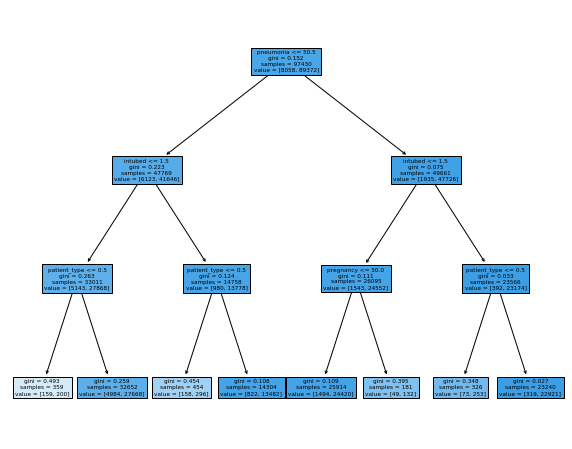

In [305]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(X_train, y_train)
plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = predictors, filled = True)


In [306]:
y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)

In [307]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9172944678230525


0.007546186447143555

In [308]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.8384598297229584


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [309]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.5


In [310]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.47799065620847797


In [311]:
confusion_matrix(y_test, y_predicted_test)

array([[    0,  2054],
       [    0, 22304]], dtype=int64)

# 7.3. NAYVE BAYES

In [312]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)





GaussianNB(priors=None, var_smoothing=1e-09)

In [313]:
y_predicted_train = gnb.predict(X_train)
y_predicted_test = gnb.predict(X_test)

In [314]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.908436826439495


0.00899958610534668

In [315]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.8559507991767988


In [316]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )

Recall: 0.5093728739388029


In [317]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.5020809736199765


In [318]:
confusion_matrix(y_test, y_predicted_test)

array([[   63,  1991],
       [  266, 22038]], dtype=int64)

# 7.4. RANDOM FOREST

In [319]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_jobs=6, random_state=42)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=6, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
preds = clf.predict(X_test)


print('The accuracy of the Random Forest(sur train) is',"{:.3f}".format(metrics.accuracy_score(preds,y_test)))


The accuracy of the Random Forest(sur train) is 0.904


In [320]:
y_predicted_train = clf.predict(X_train)
y_predicted_test = clf.predict(X_test)


In [321]:
startTimeRF = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeRF = time.time()
eval_RF_sec = endtimeRF - startTimeRF
eval_RF_sec

Accuracy: 0.9338909986657087


0.010030031204223633

In [322]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.8546877115601775


In [323]:
print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )

Recall: 0.5103212631265726


In [324]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.5049745010169687


In [325]:
#Matrice confusion
pd.crosstab(y_test, y_predicted_test, rownames=['Vrais résultats'], colnames=['Résultats prédits'])


Résultats prédits,1,2
Vrais résultats,,
1,75,1979
2,354,21950


In [326]:
confusion_matrix(y_test, y_predicted_test)

array([[   75,  1979],
       [  354, 21950]], dtype=int64)

# <font color="blue">8.  CONCLUSIONS</font>

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Model Comparation

In [206]:
# Mode iterative:

import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

from sklearn.model_selection import train_test_split
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [207]:
# Load Data

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal = dataOriginal
dataOriginal.head(5)


# Labels for descriptors

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'age','pneumonia','contact_other_covid',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','intubed'
             ]

target_column= 'icu2'

model_columns = ['sex', 'age','pneumonia','contact_other_covid',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', target_column]

dataOriginal.loc[dataOriginal['icu'] == 97, 'icu2'] = 2
dataOriginal.loc[dataOriginal['icu'] == 98, 'icu2'] = 2
dataOriginal.loc[dataOriginal['icu'] == 99, 'icu2'] = 2
dataOriginal.loc[dataOriginal['icu'] == 1, 'icu2'] = 1
dataOriginal.loc[dataOriginal['icu'] == 2, 'icu2'] = 2

dataOriginal.loc[dataOriginal['icu'].isna(), 'icu2'] = 2

dataModel =  dataOriginal[dataOriginal['age']<95]

#dataModel =  dataOriginal[dataOriginal['icu']<=2]


# Split in traning and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dataModel[predictors], 
                                                   dataModel[target_column], 
                                                   test_size=0.20, random_state=44)

models = ['KNN', 'Tree_Gini', 'Tree_Entropy', 'Bayes', 'RForest']
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1Score', 'FitTime', 'MetricsTime']
df2 = pd.DataFrame(index=metrics_labels, columns=models)



In [208]:

dataModel['icu'].value_counts()


97    444379
2     111399
1      10081
99       125
Name: icu, dtype: int64

In [209]:

dataModel['icu2'].value_counts()


2.0    555903
1.0     10081
Name: icu2, dtype: int64

In [210]:
# KNN Model
#==========

import time

startTime = time.time()
weights = 'uniform'

model1 = neighbors.KNeighborsClassifier(weights=weights,n_neighbors=15)

model1.fit(X_train, y_train.values.ravel())
endtime = time.time()
evalTimeKNN = endtime - startTime

startTime = time.time()
y_predicted_test= model1.predict(X_test)
y_predicted_train = model1.predict(X_train)

accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()
eval_secKNN = endtime - startTime

model = 'KNN'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeKNN
df2[model]['MetricsTime'] = eval_secKNN

#Desicion Tree - Gini
#=======================
startTimeDTG = time.time()
desicionTree1 = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=5)
desicionTree1.fit(X_train, y_train)
endtimeDTG = time.time()
evalTimeDTG = endtimeDTG - startTimeDTG

y_predicted_test= desicionTree1.predict(X_test)
y_predicted_train = desicionTree1.predict(X_train)

startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

model = 'Tree_Gini'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeDTG
df2[model]['MetricsTime'] = eval_sec


# Desicion Tree - Entropy
#===============================

startTimeDTG = time.time()
desicionTree2 = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree2.fit(X_train, y_train)
endtimeDTG = time.time()
evalTimeDTG = endtimeDTG - startTimeDTG

y_predicted_test= desicionTree2.predict(X_test)
y_predicted_train = desicionTree2.predict(X_train)

startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

model = 'Tree_Entropy'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeDTG
df2[model]['MetricsTime'] = eval_sec

# Nayve bayes
#============

startTimeDTG = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
endtimeDTG = time.time()
evalTimeDTG = endtimeDTG - startTimeDTG

y_predicted_test= gnb.predict(X_test)
y_predicted_train = gnb.predict(X_train)

startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

model = 'Bayes'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeDTG
df2[model]['MetricsTime'] = eval_sec
df2

# Random Forest
#============

startTimeRF = time.time()
clf = RandomForestClassifier(n_jobs=6, random_state=42)
clf.fit(X_train, y_train)
endtimeRF = time.time()
evalTimeRF = endtimeDTG - startTimeDTG

y_predicted_test= clf.predict(X_test)
y_predicted_train = clf.predict(X_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=6, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

preds = clf.predict(X_test)
model = 'RForest'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeRF
df2[model]['MetricsTime'] = eval_sec
df2


,KNN,Tree_Gini,Tree_Entropy,Bayes,RForest
Accuracy,0.983,0.983,0.982,0.98,0.99
Precision,0.977,0.982,0.977,0.967,0.977
Recall,0.548,0.731,0.509,0.509,0.632
F1Score,0.579,0.741,0.513,0.512,0.667
FitTime,796.023071,0.337971,0.244962,0.21801,0.21801
MetricsTime,3792.148428,0.220177,0.223034,0.233002,0.268009
